# Linear Regression
## Basic approach

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
cols = df.columns.tolist()
cols

['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [6]:
cols = ['Species', 'Width', 'Length1', 'Length2', 'Length3', 'Height', 'Weight']

In [9]:
df = df[cols]
print(df['Species'].unique())
df.dtypes

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


Species     object
Width      float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Weight     float64
dtype: object

In [34]:
odf = df.select_dtypes(include=['object']).copy()

odf = pd.get_dummies(df, columns=["Species"]).astype('float64')
odf = odf[ ['Width',
 'Length1',
 'Length2',
 'Length3',
 'Height',
 'Species_Whitefish',
 'Species_Bream',
 'Species_Parkki',
 'Species_Perch',
 'Species_Pike',
 'Species_Roach',
 'Species_Smelt'
 ]]


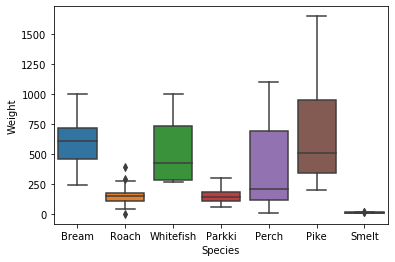

In [61]:


ax = sns.boxplot(x="Species", y="Weight", data=df, orient='v')

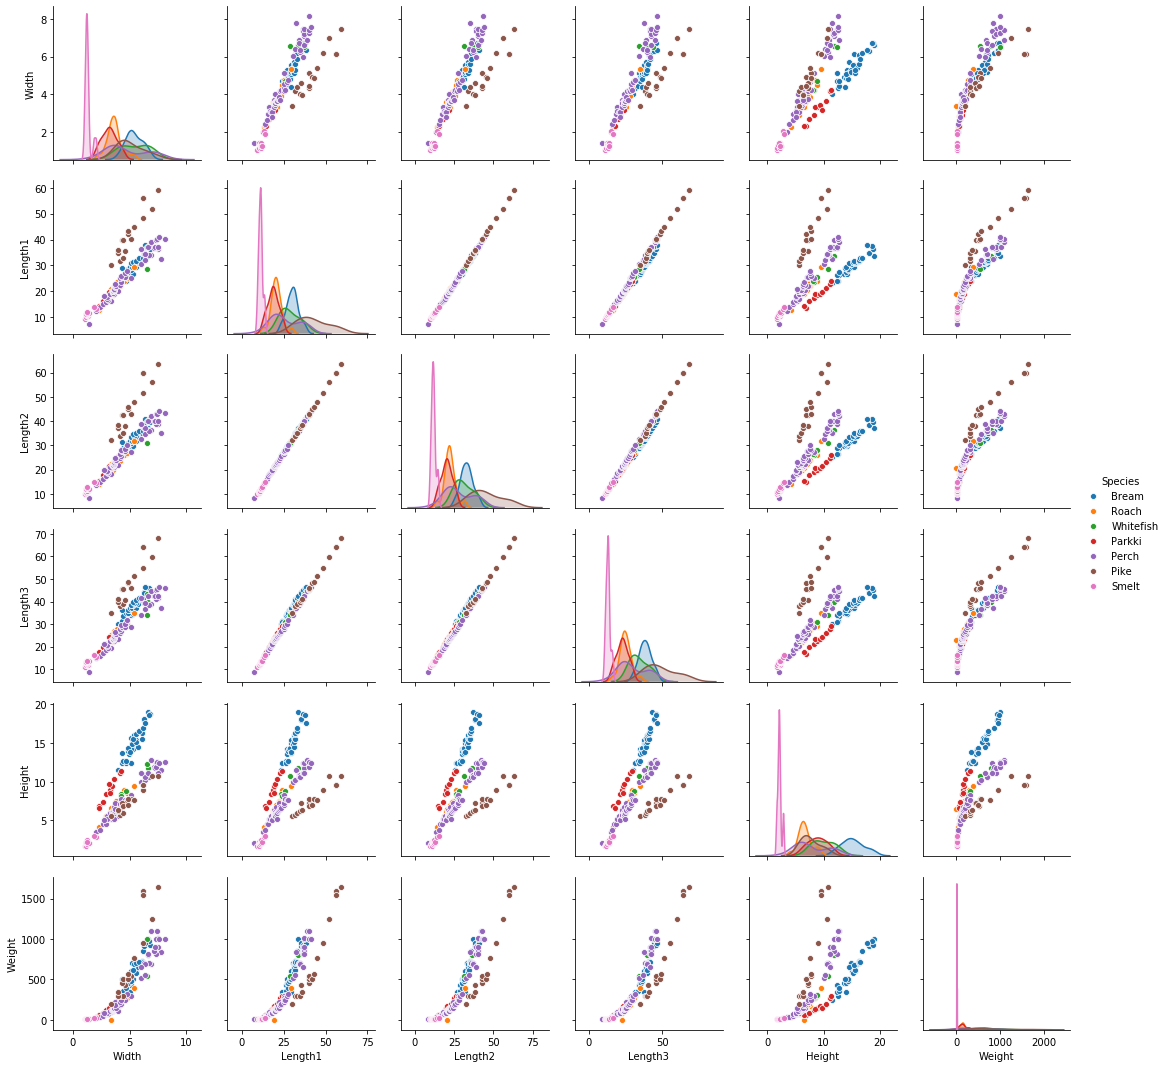

In [46]:
g = sns.pairplot(df, kind='scatter', hue = 'Species');

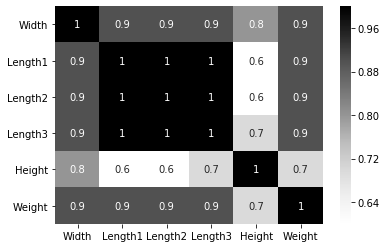

In [56]:
sns.heatmap(df.corr().round(1), annot=True, cmap='Greys');

In [19]:
X = odf.values
y = df['Weight'].values

In [14]:
X = X[:, :11]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = regressor.predict(X_test)
l_score = regressor.score(X_test,y_test)
print("ACCURACY WITH LINEAR REGRESSION --->",l_score*100)

ACCURACY WITH LINEAR REGRESSION ---> 83.15527837143381


### With Basic Approach we got 83.1% accuracy

# Now We Will optimize the model 
##  Multiple linear Regression with Back Elimination Technique

##### -----CHOOSE THE FEATURE WITH HIGHEST P-VALUE AND REPEAT THIS UNTILL ALL THE FEATURES HAVE A P-value UNDER SIGNIFICANCE LEVEL

In [27]:
import statsmodels.api as sm
X = np.append(arr = np.ones((159,1)).astype(int) , values = X,axis =1)
X_opt = X[:,[0,1,2,3,4,5,6,7,8,9,10,11]]


rego = sm.OLS(endog = y ,exog = X_opt).fit()
rego.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           6.85e-82
Time:                        21:01:46   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -472.2588     36.278    -13.018      0.000    -543.952    -400.566
x1            -0.5154     23.913     -0.022      0.983     -47.773      46.742
x2           -80.3030     36.279     -2.214      0.028    -151.998      -8.608
x3            79.8886     45.718      1.747      0.083     -10.461     170.238
x4            32.5354     29.300      1.110      0.269     -25.369      90.439
x5             5.2510     13.056      0.402      0.688     -20.551      31.053
x6          -352.1991     62.857     -5.603      0.000    -476.419    -227.979
x7          -446.0733    119.430     -3.735      0.000    -682.095    -210.051
x8          -281.3507     66.468     -4.233      0.000    -412.707    -149.995
x9          -308.1244     42.941     -7.176      0.000    -392.985    -223.263
x10         -654.5027     74.067     -8.837      0.000    -800.877    -508.128
x11         -343.0334     47.145     -7.276      0.000    -436.204    -249.863
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
X_opt = X[:,[0,2,3,4,5,6,7,8,9,10,11]]
rego = sm.OLS(endog = y,exog = X_opt).fit()
rego.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     216.8
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           4.53e-83
Time:                        21:03:23   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1905.
Df Residuals:                     148   BIC:                             1939.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -472.0747     35.138    -13.435      0.000    -541.512    -402.637
x1           -80.3555     36.074     -2.228      0.027    -151.642      -9.069
x2            79.9867     45.337      1.764      0.080      -9.605     169.578
x3            32.4518     28.944      1.121      0.264     -24.745      89.649
x4             5.0868     10.567      0.481      0.631     -15.794      25.968
x5          -352.2470     62.605     -5.626      0.000    -475.963    -228.531
x6          -445.0102    108.402     -4.105      0.000    -659.225    -230.795
x7          -280.8292     61.700     -4.552      0.000    -402.756    -158.902
x8          -308.3749     41.199     -7.485      0.000    -389.789    -226.961
x9          -654.1980     72.460     -9.028      0.000    -797.388    -511.008
x10         -343.0159     46.979     -7.301      0.000    -435.852    -250.180
==============================================================================
Omnibus:                       43.630   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.697
Skew:                           1.185   Prob(JB):                     6.10e-22
Kurtosis:                       6.021   Cond. No.                         997.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X_opt = X[:,[0,2,3,4,6,7,8,9,10,11]]
rego = sm.OLS(endog = y,exog = X_opt).fit()
rego.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     242.1
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           3.17e-84
Time:                        21:03:36   Log-Likelihood:                -941.59
No. Observations:                 159   AIC:                             1903.
Df Residuals:                     149   BIC:                             1934.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -480.0985     30.854    -15.560      0.000    -541.066    -419.131
x1           -82.0472     35.810     -2.291      0.023    -152.808     -11.287
x2            79.9316     45.220      1.768      0.079      -9.424     169.287
x3            35.4408     28.197      1.257      0.211     -20.278      91.159
x4          -345.3412     60.782     -5.682      0.000    -465.448    -225.234
x5          -421.2990     96.316     -4.374      0.000    -611.621    -230.977
x6          -262.5343     48.481     -5.415      0.000    -358.334    -166.735
x7          -303.6726     39.921     -7.607      0.000    -382.557    -224.789
x8          -678.1863     52.470    -12.925      0.000    -781.867    -574.506
x9          -339.4185     46.261     -7.337      0.000    -430.831    -248.006
==============================================================================
Omnibus:                       41.275   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.169
Skew:                           1.136   Prob(JB):                     4.34e-20
Kurtosis:                       5.880   Cond. No.                         914.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X_opt = X[:,[0,2,3,6,7,8,9,10,11]]
rego = sm.OLS(endog = y,exog = X_opt).fit()
rego.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     271.1
Date:                Wed, 25 Dec 2019   Prob (F-statistic):           4.08e-85
Time:                        21:03:51   Log-Likelihood:                -942.43
No. Observations:                 159   AIC:                             1903.
Df Residuals:                     150   BIC:                             1930.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -464.4567     28.287    -16.419      0.000    -520.349    -408.564
x1           -82.4621     35.877     -2.298      0.023    -153.352     -11.572
x2           117.7647     33.811      3.483      0.001      50.957     184.572
x3          -317.6313     56.752     -5.597      0.000    -429.769    -205.494
x4          -317.6614     49.874     -6.369      0.000    -416.207    -219.116
x5          -232.4103     42.224     -5.504      0.000    -315.841    -148.980
x6          -315.8757     38.797     -8.142      0.000    -392.535    -239.217
x7          -670.3520     52.199    -12.842      0.000    -773.492    -567.212
x8          -304.2709     36.924     -8.241      0.000    -377.228    -231.313
==============================================================================
Omnibus:                       37.879   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.274
Skew:                           1.068   Prob(JB):                     1.66e-17
Kurtosis:                       5.665   Cond. No.                         571.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
X_trainBE, X_testBE, y_trainBE, y_testBE = train_test_split(X_opt, y, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor_backward = LinearRegression()
regressor_backward.fit(X_trainBE, y_trainBE)

# Predicting the Test set results
y_predBE = regressor_backward.predict(X_testBE)
mscore = regressor_backward.score(X_testBE,y_testBE)
print("ACCURACY WITH MULTIPLE LINEAR REGRESSION---->",mscore)

ACCURACY WITH MULTIPLE LINEAR REGRESSION----> 0.9257270557612252


### With Back Elimination we got 92.5% Accuracy